# <font color='#Ab2a3e'>K-Means clustering algorithm from scratch</font>
---
The purpose of this notebook is to understand deeply this unsupervised learning algoritm, without using libraries like sklearn. Firstly, we will simulate the data for 3 clusters case:

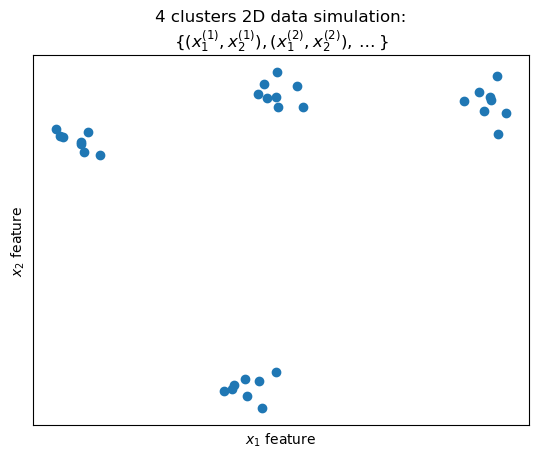

In [69]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

k = 4 #number of clusters
C = np.random.randint(1, 15, (k, 2))
X = np.tile(C, reps = (8, 1)) + np.random.randn(8 * k, 2) * 0.35 # adding noise around 
plt.scatter(X[:, 0], X[:, 1])
plt.xticks([])
plt.yticks([])
plt.xlabel(r'$x_1$ feature')
plt.ylabel(r'$x_2$ feature')
plt.title(f'{k} clusters 2D data simulation:\n' +
          r'$\{(x_1^{(1)}, x_2^{(1)}), (x_1^{(2)}, x_2^{(2)}), \dots \} $')
plt.show()

## Implementing K-Means
- Given a training set $X = \{x^{(1)}, x^{(2)}, \dots \}$ with unlabeled data, we want to group it into $k$ clusters.

- Starts by choosing the initial centroids: $\mu_1, \dots, \mu_k$. We will randomly choose points from our dataset as centroids several times, keeping at the end the most favorable sample. Here, "the most favorable one" means the one that minimizes the following function: $$\frac{1}{m} * \sum_{i = 1}^m \| x^{(i)} - \mu_{c^{(i)}} \|^2$$
      $c^{(i)}$ = Cluster assigned to the example $x^{(i)}$  
      $\mu_{c^{(i)}}$ = Centroid of that cluster    

- Then, repeatedly, datapoints are assigned to their closest centroids and centroids are recalculated to be in the center of their clusters

In [6]:
def init_centroids(X, k, iter = 1):
    """
    Returns the best initial centroids given the data X, the number of clusters k, and the number of iterations.
    """
    m = X.shape[0]
    n = X.shape[1]
    
    if iter == 1:
        centroids = X[np.random.permutation(m)[:k]]

    else:
        best_centroids = X[:k] #possible value initialization
        ccx = find_closest_centroids(X, best_centroids)
        min_cost = compute_cost_funct(X, best_centroids, ccx)
        for i in range(iter):
            centroids = X[np.random.permutation(m)[:k]]
            ccx = find_closest_centroids(X, centroids)
            cost = compute_cost_funct(X, centroids, ccx)
            if(cost > min_cost):
                min_cost = cost
                best_centroids = centroids

    
    return centroids


def find_closest_centroids(X, centroids):
    """
    Given the data X and the array of centroids, it returns an array with the index of the cluster with the
    closest centroid for each data example.
    """
    K = centroids.shape[0]
    m = X.shape[0]
    ccx = np.zeros(m, dtype=int)
    for i in range(m):
        norms = [] # distances between example X^i and each centroid mu_j
        for j in range(k):
            norms.append( np.linalg.norm(X[i] - centroids[j]) )

        ccx[i] = np.argmin(norms)

    return ccx
    

def compute_new_centroids(X, ccx, k, previous_centroids):
    """
    Given the data X (m, n), the cluster index for each example ccx (m,) and the number of clusters k;
    it returns the new centroids for each cluster (k, n)
    """
    n = X.shape[1]
    centroids = np.zeros((k, n))
    for j in range(k):
        C_j = X[ccx == j] #points which closest centroid is j
        if C_j.shape[0] != 0:
            centroids[j] = np.mean( C_j , axis = 0)
        else:
            centroids[j] = previous_centroids[j]

    return centroids


def compute_cost_funct(X, centroids, ccx):
    """
    Given the data X (m, n), the centroids (k, n), the index of the closest cluster to each data point
    (m,), it returns the mean of the L2 squared distance between examples and the centroids of their clusters.
    """
    m = X.shape[0]
    k = len(centroids)
    cost = 1 / m * np.sum([np.linalg.norm(X[j] - centroids[ccx[j]]) for j in range(m)])
    return cost

In [7]:
def run_kMeans(X, k, max_iters = 10, init_iters = 1, plot_progress = False):
    """
    Run KMeans clustering algorithm.
    Returns the ndarray centroids (k,n) and the index of the cluster which each data point belongs.
    Plotting progress only for 2D data.
    """
    centroids = init_centroids(X, k, init_iters)
    m = X.shape[0]
    n = X.shape[1]

    if plot_progress:
        previous_centroids = init_centroids
    
    for i in range(max_iters):
        print(f'K-Means iteration {i + 1}/{max_iters}')
        ccx = find_closest_centroids(X, centroids)
        
        if plot_progress:
            previous_centroids = centroids
            for j in range(k):
                plt.scatter(centroids[j,0], centroids[j,1], marker = 'x', c = 'black')
                
        centroids = compute_new_centroids(X, ccx, k, previous_centroids= centroids)

        if plot_progress:
            for j in range(k):
                plt.plot(
                    [previous_centroids[j,0], centroids[j,0]], [previous_centroids[j,1], centroids[j,1]],
                    linestyle = '-',
                    c = 'black'
                )
                plt.scatter(centroids[j,0], centroids[j,1], marker = 'x', c = 'black')


    if plot_progress:
        plt.scatter(X[:,0], X[:,1], c = ccx)
        plt.xticks([])
        plt.yticks([])
        plt.scatter([], [], marker = 'x', c = 'black', label = 'Centroids trace')
        plt.legend()
        plt.show()

    return centroids, ccx

K-Means iteration 1/20
K-Means iteration 2/20
K-Means iteration 3/20
K-Means iteration 4/20
K-Means iteration 5/20
K-Means iteration 6/20
K-Means iteration 7/20
K-Means iteration 8/20
K-Means iteration 9/20
K-Means iteration 10/20
K-Means iteration 11/20
K-Means iteration 12/20
K-Means iteration 13/20
K-Means iteration 14/20
K-Means iteration 15/20
K-Means iteration 16/20
K-Means iteration 17/20
K-Means iteration 18/20
K-Means iteration 19/20
K-Means iteration 20/20


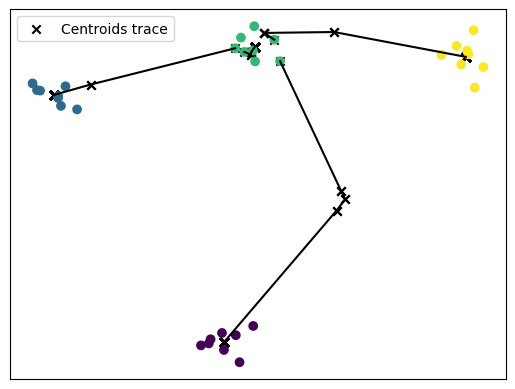

(array([[ 5.02513453,  3.11734969],
        [ 0.9958034 ,  8.85853573],
        [ 5.74064608,  9.97203951],
        [10.72522225,  9.74469081]]),
 array([2, 1, 3, 0, 2, 1, 3, 0, 2, 1, 3, 0, 2, 1, 3, 0, 2, 1, 3, 0, 2, 1,
        3, 0, 2, 1, 3, 0, 2, 1, 3, 0]))

In [71]:
run_kMeans(X, k, plot_progress=True, max_iters = 20)

## Using K-Means for image compression
- Each pixel is represented as three 8-bit unsigned integers (from 0 to 255) (RGB).
- The original image will have thousands of colors. Using K-Means we can reduce it into a few of them.
- If k = 16 we would only need 4 bits to encode each pixel.

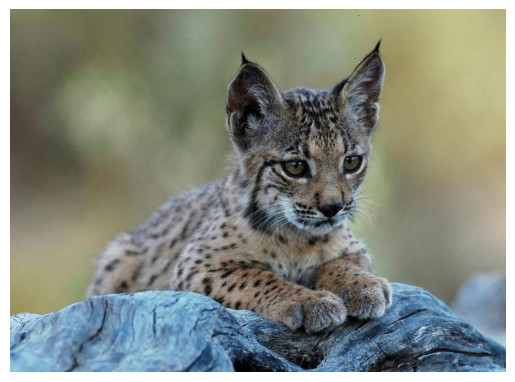

In [10]:
original_img = plt.imread('Iberian_Lynx_cub.jpg')
plt.axis('off')
plt.imshow(original_img)
plt.show()

In [11]:
original_img.shape

(713, 975, 3)

In [12]:
# mapping into the 0-1 range and reshaping from 2D to 1D
original_img = original_img / 255
X_img = original_img.reshape(original_img.shape[0] * original_img.shape[1], 3)

In [13]:
centroids, ccx = run_kMeans(X_img, k = 16, max_iters = 20)

K-Means iteration 1/20
K-Means iteration 2/20
K-Means iteration 3/20
K-Means iteration 4/20
K-Means iteration 5/20
K-Means iteration 6/20
K-Means iteration 7/20
K-Means iteration 8/20
K-Means iteration 9/20
K-Means iteration 10/20
K-Means iteration 11/20
K-Means iteration 12/20
K-Means iteration 13/20
K-Means iteration 14/20
K-Means iteration 15/20
K-Means iteration 16/20
K-Means iteration 17/20
K-Means iteration 18/20
K-Means iteration 19/20
K-Means iteration 20/20


In [14]:
print(ccx.shape)

(695175,)


- We assign to each point the color represented by the centroid of its cluster.

In [16]:
X_recovered = centroids[ccx]
X_recovered = X_recovered.reshape(original_img.shape)

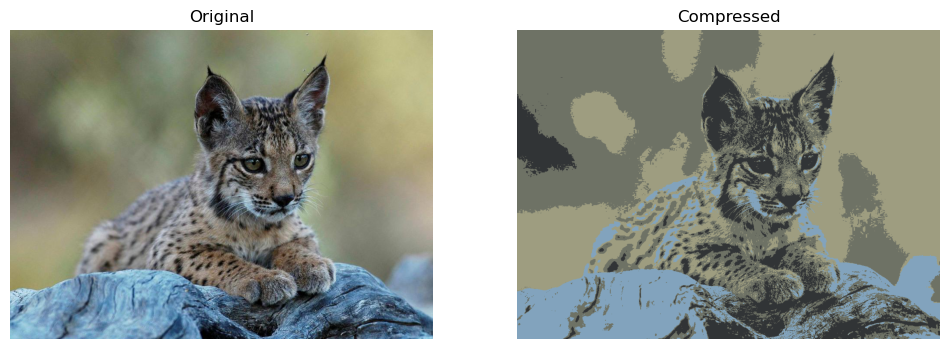

In [17]:
fig, ax = plt.subplots(1, 2, figsize = (12,12))
ax[0].imshow(original_img)
ax[0].set_title('Original')
ax[0].set_axis_off()
ax[1].imshow(X_recovered)
ax[1].set_title('Compressed')
ax[1].set_axis_off()
plt.show()